In this notebook I'll show how to create word of clouds with the use of Python package called stylecloud. In order to do that we're going to use the quotes' dataset. Our dataset consists of almost 500k observations. We can suggest that our images can show the most common words in the main aphorisms. 

In [1]:
pip install stylecloud

     |████████████████████████████████| 262 kB 865 kB/s 
     |████████████████████████████████| 161 kB 3.5 MB/s 
     |████████████████████████████████| 87 kB 2.4 MB/s 
     |████████████████████████████████| 87 kB 2.4 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=71dd36be57d142b61ac66e7c8d13c300e1b28f311d0161b1ac6866e6e29278e3
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=1f7d2047e9297f646ba90d343b9152e249884684bc12fbe8d7a1cd28c0626048
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43940 sha256=a2cfa38dd8f74e5437b20d70732613f63d87f08bd29cf08ddc24ec24ff57d184
  Stored in directory: /root/.cache/pip/wheels/6c/66/e8/e53d7a476011891fa51a5ee83a2d1852b19b258f9750

In [2]:
import pandas as pd
import stylecloud
import os
from IPython.display import Image

In [3]:
data = pd.read_csv('../input/quotes-500k/quotes.csv')

In [4]:
data.shape

(499709, 3)

In [5]:
data = data.drop_duplicates().reset_index()

In [6]:
data.to_csv('quotes.csv', index=False)

In [7]:
concat_quotes = ' '.join([i for i in data.quote.astype(str)])
print(concat_quotes[:1000])

I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best. You've gotta dance like there's nobody watching,Love like you'll never be hurt,Sing like there's nobody listening,And live like it's heaven on earth. You know you're in love when you can't fall asleep because reality is finally better than your dreams. A friend is someone who knows all about you and still loves you. Darkness cannot drive out darkness: only light can do that. Hate cannot drive out hate: only love can do that. We accept the love we think we deserve. Only once in your life, I truly believe, you find someone who can completely turn your world around. You tell them things that you’ve never shared with another soul and they absorb everything you say and actually want to hear more. You share hopes for the future, dreams that will never come true, goals that were never achieved

### Plotting cloud of words

Let's see the most common words in our dataset's citations.

In [8]:
stylecloud.gen_stylecloud(text=concat_quotes,
                          icon_name='fas fa-biking',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal',
                          size=1024)

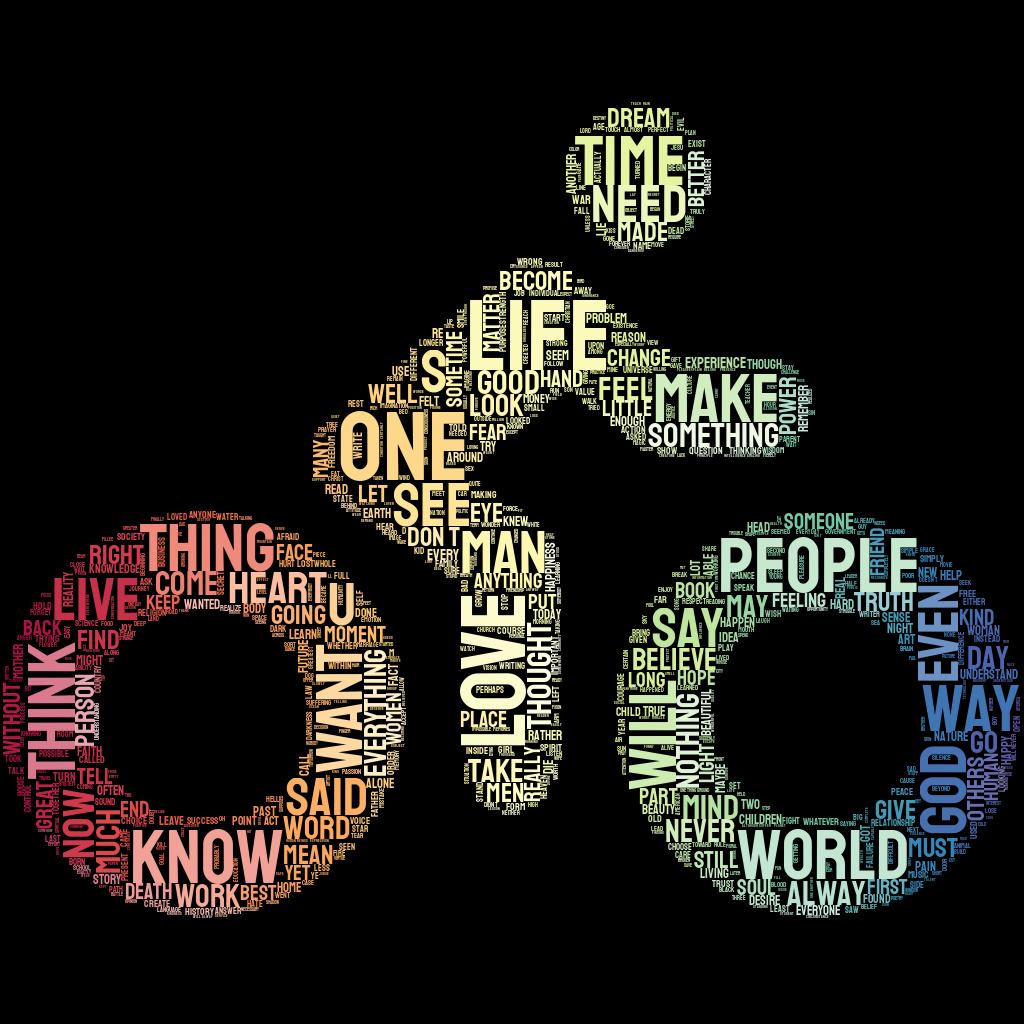

In [9]:
Image(filename="./stylecloud.png", width=1024, height=1024)

In [10]:
data.head()

index                                              quote  \
0      0  I'm selfish, impatient and a little insecure. ...   
1      1  You've gotta dance like there's nobody watchin...   
2      2  You know you're in love when you can't fall as...   
3      3  A friend is someone who knows all about you an...   
4      4  Darkness cannot drive out darkness: only light...   

                                              author  \
0                                     Marilyn Monroe   
1                                  William W. Purkey   
2                                          Dr. Seuss   
3                                     Elbert Hubbard   
4  Martin Luther King Jr., A Testament of Hope: T...   

                                            category  
0  attributed-no-source, best, life, love, mistak...  
1  dance, heaven, hurt, inspirational, life, love...  
2  attributed-no-source, dreams, love, reality, s...  
3                friend, friendship, knowledge, love  
4  darkness, drive-out, hate, inspirational, ligh...

In [11]:
data.author.value_counts()[:40]

Debasish Mridha                                                                                                        6601
Lailah Gifty Akita                                                                                                     5384
Sunday Adelaja                                                                                                         4911
Lailah Gifty Akita, Think Great: Be Great!                                                                             3059
Matshona Dhliwayo                                                                                                      2258
Lailah Gifty Akita, Pearls of  Wisdom: Great  mind                                                                     2120
Mehmet Murat ildan                                                                                                     1897
Billy Graham, Billy Graham in Quotes                                                                                   1861
Anonymou

In [12]:
data.dropna(inplace=True)

### Cloud of words of most popular authors' citations

In [13]:
stylecloud.gen_stylecloud(text=''.join([i for i in data[data.author.str.contains('Debasish Mridha')].quote]),
                          icon_name='fas fa-dharmachakra',
                          palette='colorbrewer.sequential.BuGn_9',
                          background_color='black',
                          gradient='horizontal',
                          size=1024)

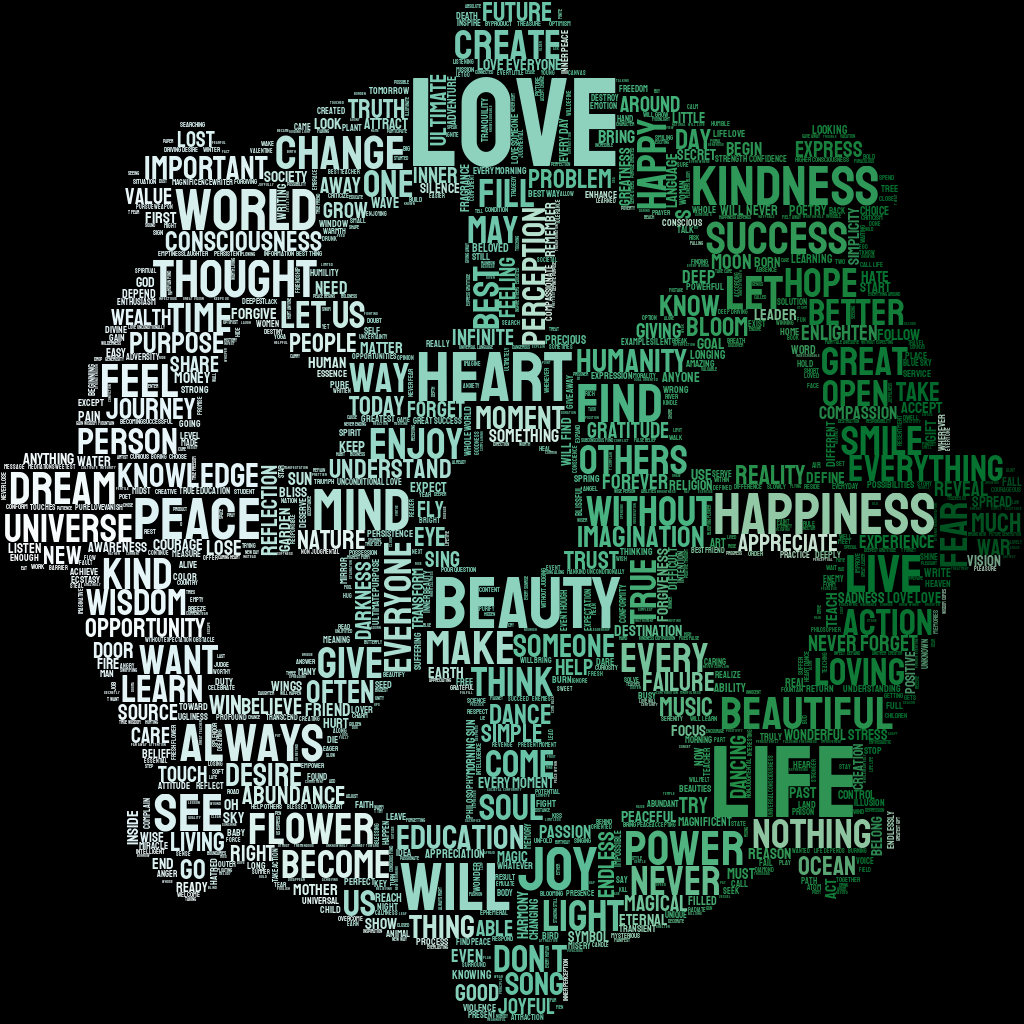

In [14]:
Image(filename="./stylecloud.png", width=1024, height=1024)

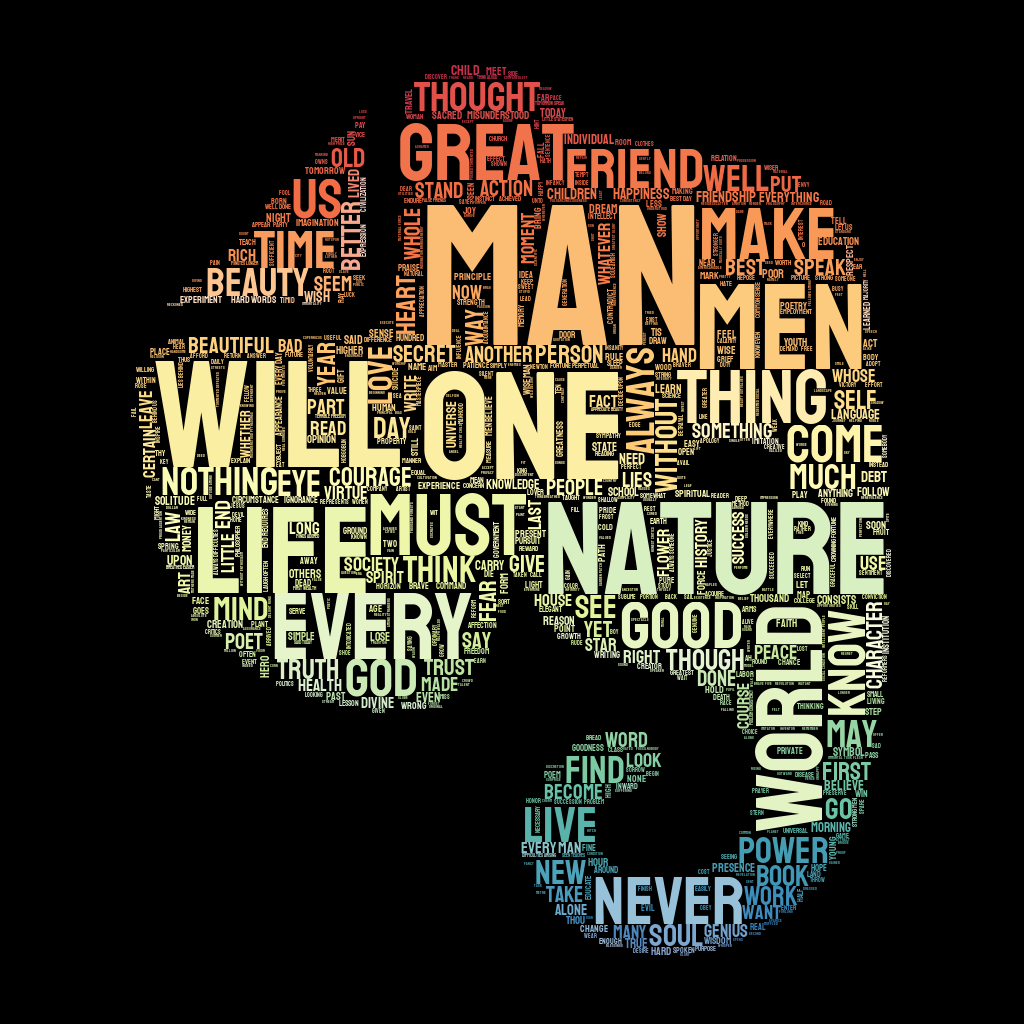

In [15]:
stylecloud.gen_stylecloud(text=''.join([i for i in data[data.author.str.contains('Ralph Waldo Emerson')].quote]),
                          icon_name='fab fa-evernote',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='vertical',
                          size=1024)

Image(filename="./stylecloud.png", width=1024, height=1024)

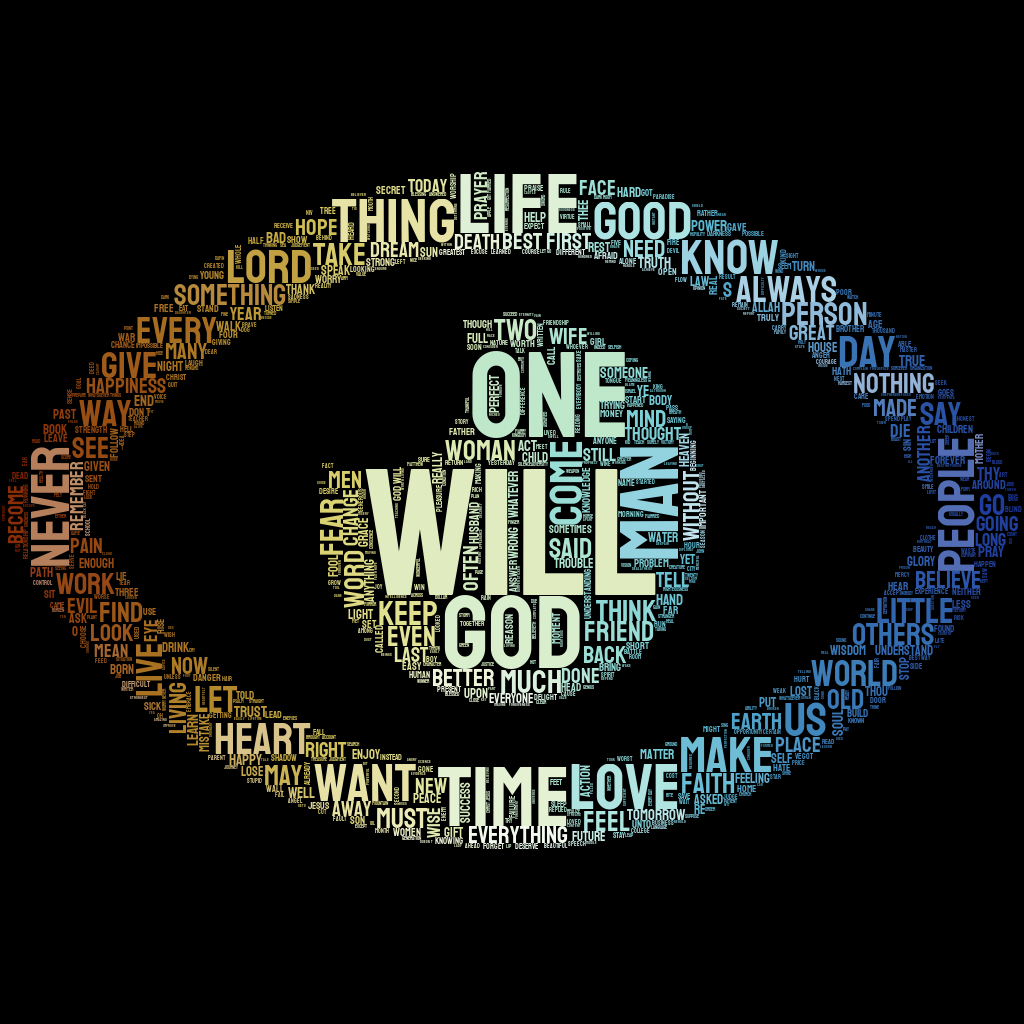

In [16]:
stylecloud.gen_stylecloud(text=''.join([str(i) for i in data[data.author.str.contains('Anonymous')].quote]),
                          icon_name='far fa-eye',
                          palette='scientific.diverging.Roma_17',
                          background_color='black',
                          gradient='center',
                          size=1024)

Image(filename="./stylecloud.png", width=1024, height=1024)

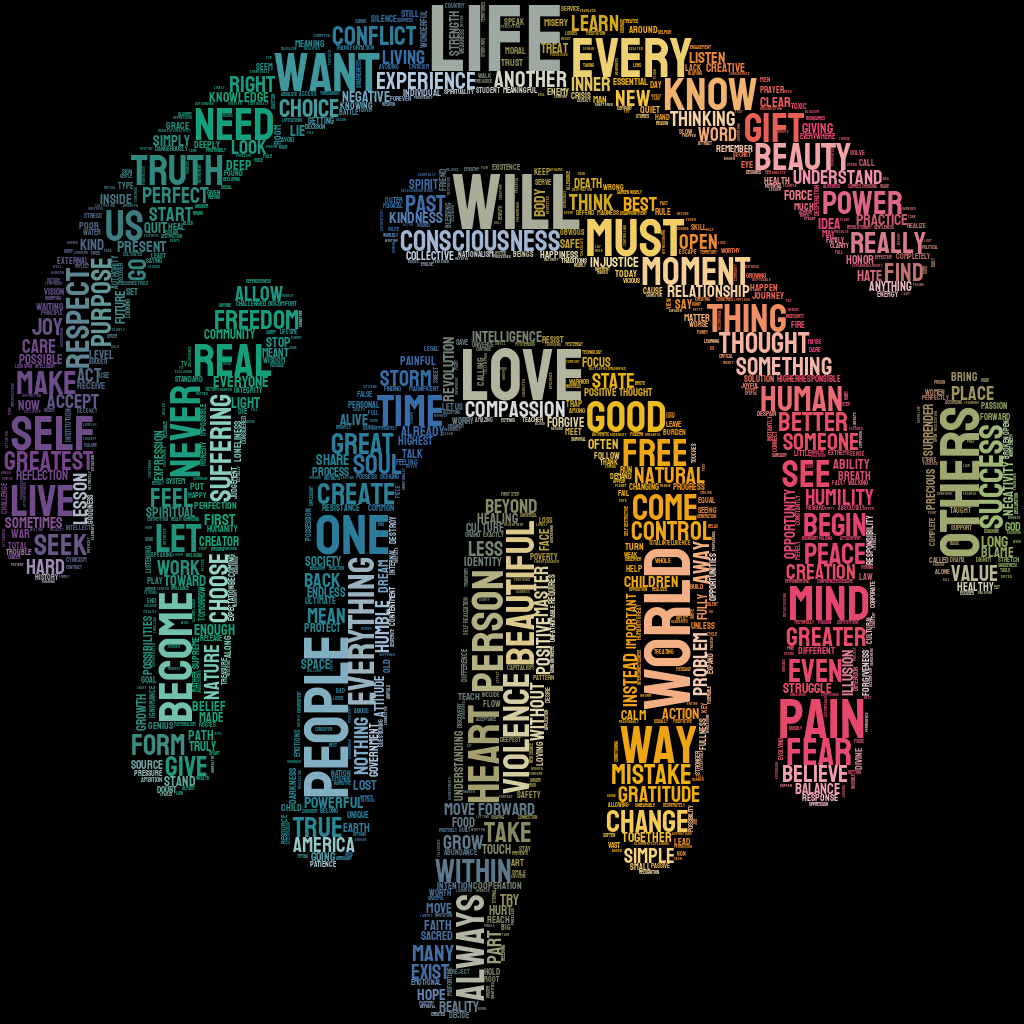

In [17]:
stylecloud.gen_stylecloud(text=''.join([str(i) for i in data[data.author.str.contains('Bryant McGill')].quote]),
                          icon_name='fas fa-fingerprint',
                          palette='cartocolors.qualitative.Bold_6',
                          background_color='black',
                          gradient='center',
                          size=1024)

Image(filename="./stylecloud.png", width=1024, height=1024)

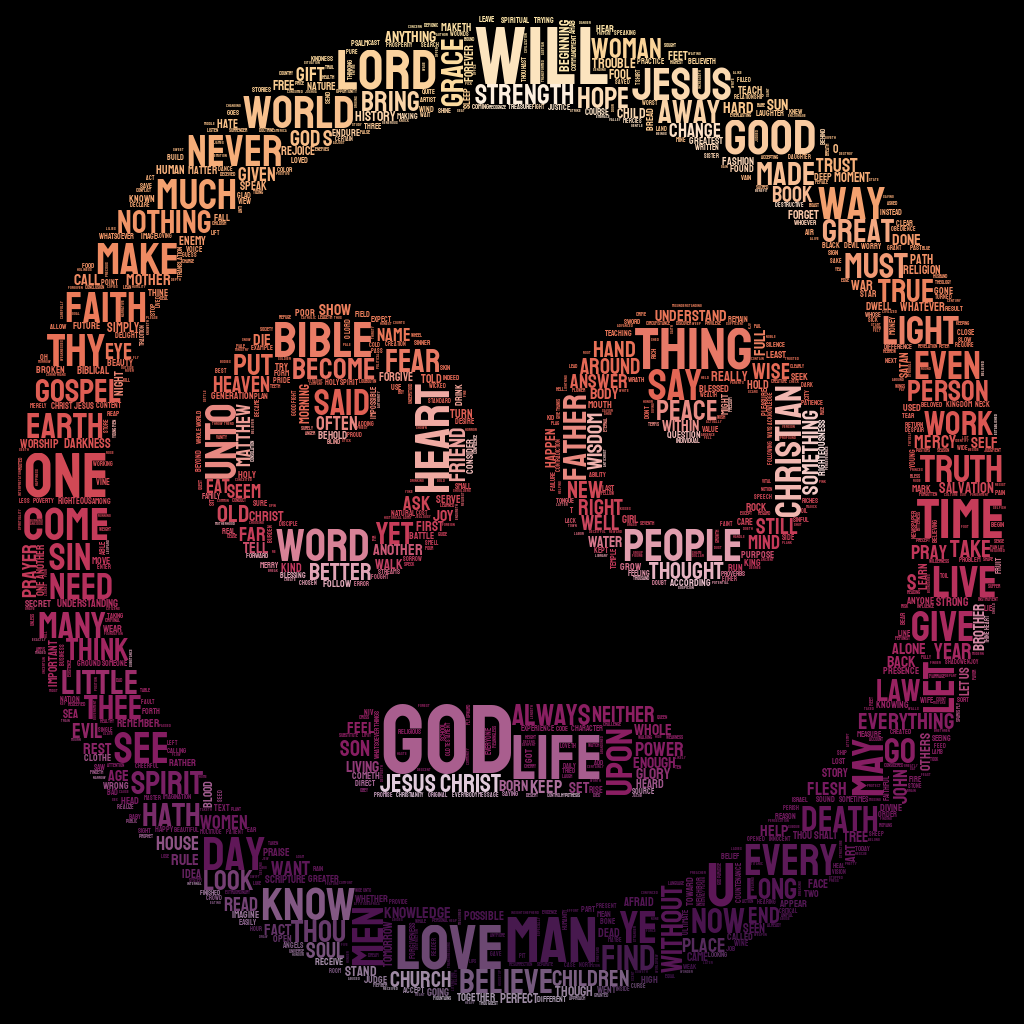

In [18]:
stylecloud.gen_stylecloud(text=''.join([str(i) for i in data[data.author.str.contains('Bible')].quote]),
                          icon_name='far fa-meh-rolling-eyes',
                          palette='cmocean.sequential.Matter_10',
                          background_color='black',
                          gradient='vertical',
                          size=1024)


Image(filename="./stylecloud.png", width=1024, height=1024)

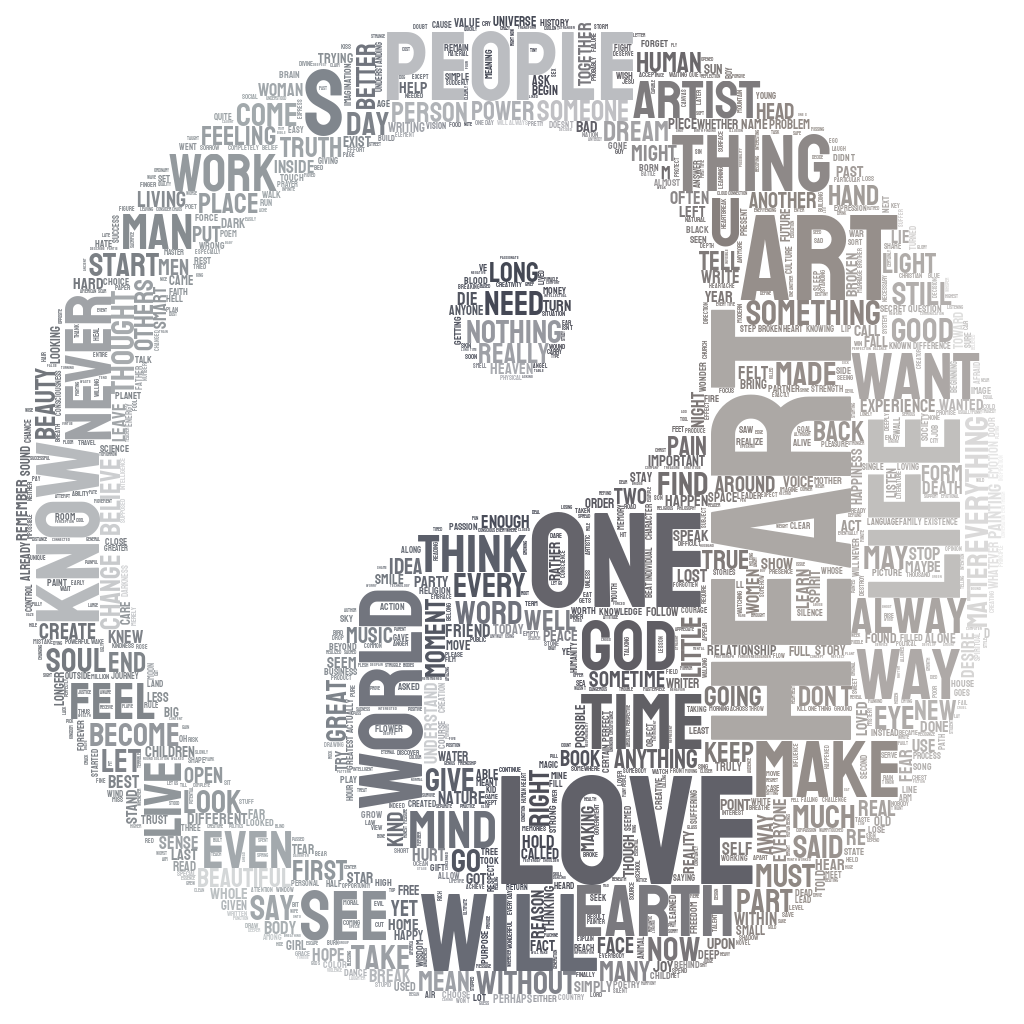

In [19]:
stylecloud.gen_stylecloud(text=''.join([str(i) for i in data[data.category.str.contains('art')].quote]),
                          icon_name='fas fa-yin-yang',
                          palette='tableau.Gray_5',
                          background_color='white',
                          gradient='center',
                          size=1024)


Image(filename="./stylecloud.png", width=1024, height=1024)

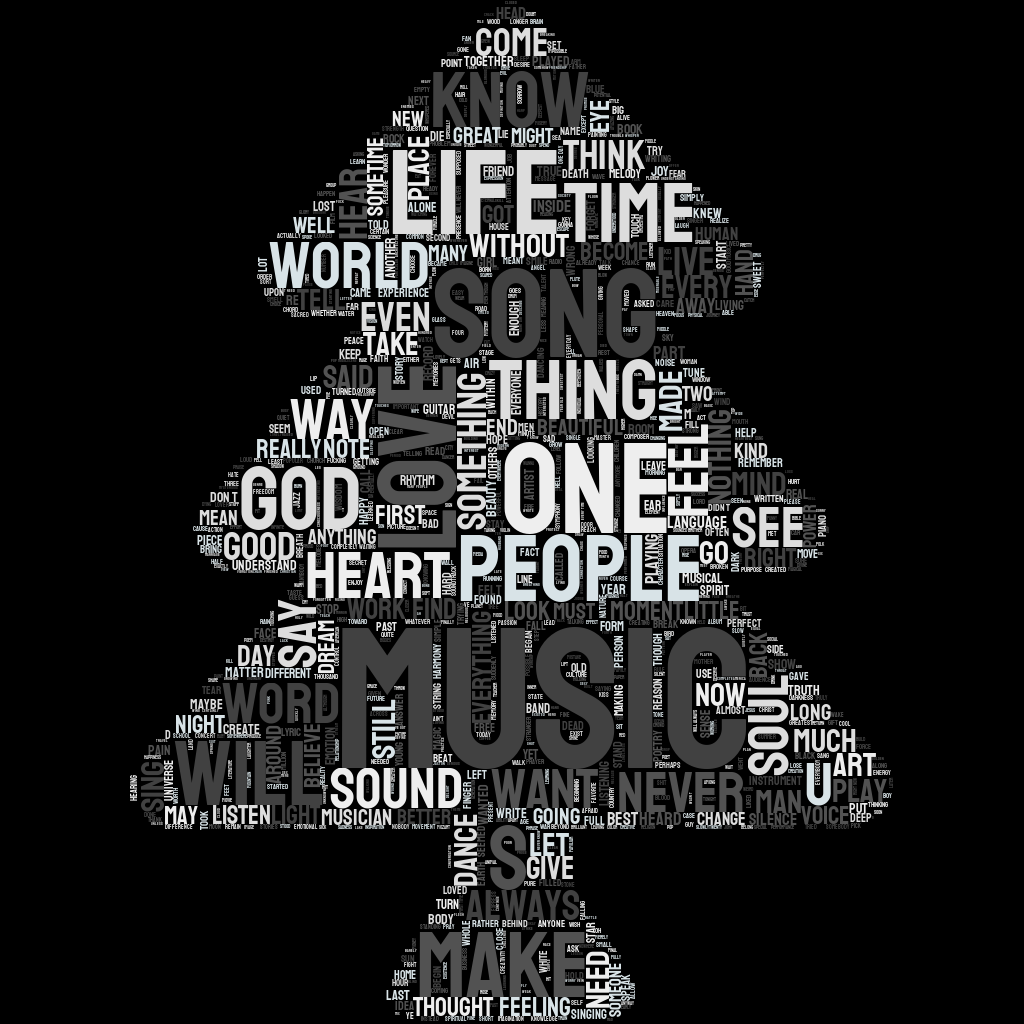

In [20]:
stylecloud.gen_stylecloud(text=''.join([str(i) for i in data[data.category.str.contains('music')].quote]),
                          icon_name='fas fa-tree',
                          colors=['#525252', '#414141', '#D8E3E7','#EEEEEE','#DDDDDD'],
                          background_color='black',
                          gradient='horizontal',
                          size=1024)


Image(filename="./stylecloud.png", width=1024, height=1024)